# Pyalcs - example
## Imports and configuration
Load project files from upper directory (nasty solution).

In [1]:
import sys
sys.path.append('/Users/khozzy/Projects/pyalcs')

Import `pyalcs` module

In [2]:
from alcs.agent.acs2 import ACS2
from alcs.environment.maze import Maze

Other helpers

In [3]:
%matplotlib inline

import matplotlib.pyplot as plt
import pandas as pd

# Visualization
from examples.helpers.visualization import plot_performance

## Experiment

Evalute the algorithm

In [108]:
performance = pd.DataFrame()

# Number of experiments
EXPERIMENTS = 100

# Number of generations for each experiment
GENERATIONS = 500

for experiment in range(EXPERIMENTS):
    
    # Initialize the environment
    env = Maze('mazes/MazeF2.maze')

    # Initialize the agent
    agent = ACS2(env)
    
    # Evaluate classifier
    classifiers, metrics = agent.evaluate(GENERATIONS)
    
    # Add information about the experiment into metrics
    metrics['experiment_id'] = [experiment] * len(metrics['time'])
    
    # Append performance metrics
    performance = performance.append(pd.DataFrame(metrics))

## Performance metrics
### Number of steps to food
How many steps were needed in each trial to found the reward.

In [88]:
def get_avg_number_of_steps_to_food(performance):
    trials_by_experiment = pd.DataFrame(performance
                                        .groupby('experiment_id')
                                        .apply(lambda x: x['found_reward'].cumsum())
                                        .stack())
    trials_by_experiment.reset_index(inplace=True)
    trials_by_experiment.rename(columns = {'found_reward': 'time', 0: 'trial'},
                                inplace=True)

    # Experiment_id, trial, steps
    steps_per_trial_in_experiment = pd.DataFrame(trials_by_experiment
                                                 .groupby(['experiment_id', 'trial'])
                                                 .size())
    steps_per_trial_in_experiment.reset_index(inplace=True)
    steps_per_trial_in_experiment.rename(columns = {0: 'steps'}, inplace=True)

    # Trial, averaged steps
    averaged_steps_per_trial = pd.DataFrame(steps_per_trial_in_experiment.groupby('trial')['steps'].mean())
    averaged_steps_per_trial.rename(columns = {'steps': 'averaged_steps'}, inplace=True)
    averaged_steps_per_trial.reset_index(inplace=True)
    
    return averaged_steps_per_trial

## Plot the results
First declare helper function for marking time when classifier found the reward

In [ ]:
def _filter(metrics: list, mask: list) -> list:
    filtered = []

    for i, n in enumerate(metrics):
        if mask[i]:
            filtered.append(n)
        else:
            filtered.append(None)

    return filtered

### Number of steps to food

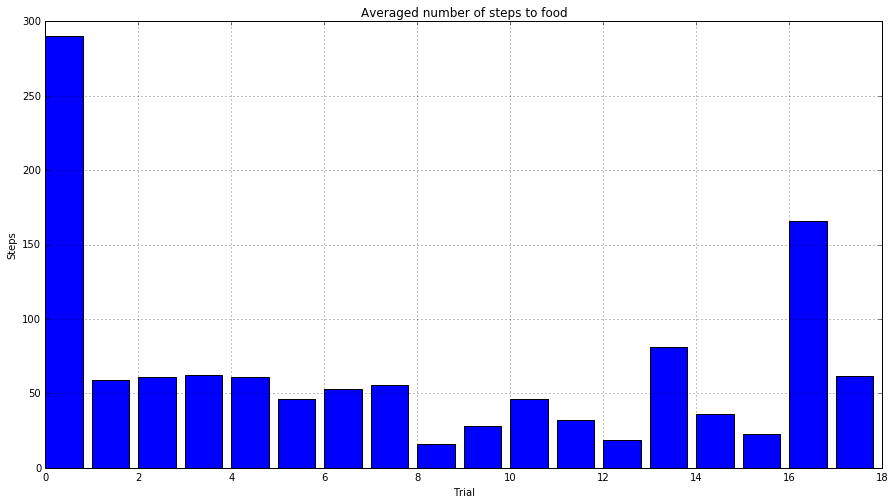

In [109]:
steps_to_food = get_avg_number_of_steps_to_food(performance)

fig = plt.figure(figsize=(15, 8), dpi=100)

plt.bar(steps_to_food['trial'], steps_to_food['averaged_steps'])
plt.title('Averaged number of steps to food')
plt.xlabel('Trial')
plt.ylabel('Steps')
plt.grid(True)

plt.show()